## H1N1 VACCINE PREDICTION

#### PROJECT OVERVIEW
The goal of this project is to predict whether individuals received the H1N1 flu vaccine based on data collected from the National 2009 H1N1 Flu Survey. By analyzing various features from the dataset, we aim to build a predictive model that can identify the likelihood of someone having received the H1N1 vaccine. This information is valuable for public health officials seeking to understand vaccine uptake patterns and tailor future vaccination campaigns.


#### PROBLEM STATEMENT
Given a dataset containing demographic, behavioral, and opinion-related information from respondents of the National 2009 H1N1 Flu Survey, the task is to develop a predictive model to determine whether a respondent received the H1N1 flu vaccine. This is a binary classification problem where the target variable is the receipt of the H1N1 vaccine, categorized as either 'Yes' or 'No'.

The dataset includes various features such as age, gender, income level, health status, exposure risk, and attitudes towards vaccination. The challenge lies in effectively utilizing these features to build a robust model that can accurately classify respondents based on their likelihood of having received the vaccine.

Key objectives include:

Feature Selection and Engineering: Identifying which features are most predictive of vaccine receipt and transforming raw data into meaningful attributes that enhance model performance.
Model Selection: Comparing different classification algorithms (e.g., logistic regression and decision trees) to find the most effective approach.
Performance Evaluation: Assessing the model’s accuracy, precision, recall, and overall effectiveness using appropriate metrics and validation techniques to ensure reliability and generalizability.
Interpretability: Providing insights into how different features contribute to the predictions, which can be valuable for understanding vaccination behavior and informing public health strategies.
The ultimate goal is to create a model that not only predicts vaccine receipt with high accuracy but also offers actionable insights for public health officials to target and improve vaccination efforts, potentially reducing the impact of future flu pandemics.



#### DATA UNDERSTANDING
This particular dataset is part of a competition designed to predict flu vaccination patterns, drawing from the National 2009 H1N1 Flu Survey. The data includes comprehensive details about survey respondents, encompassing their health behaviors, opinions on flu vaccines, and demographic information.
The dataset includes various features related to respondents' backgrounds and behaviors. Key aspects of the dataset may include:
Demographic Information: Age, gender, education level, income, etc.
Health Behaviors: General health status, history of vaccination, frequency of healthcare visits, etc.
Opinions and Attitudes: Attitudes towards vaccines, perceived risk of flu, etc.
Target Variable: H1N1 Vaccine Receipt: Binary variable indicating whether the respondent received the H1N1 vaccine (1 for Yes, 0 for No).

##### Loading the Datasets

In [1]:
#Importing the necessary libraries
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

The next step is to load the training data dataset and investigating the structure, statistical overview and datatypes.

In [2]:
#loading the training data and viewing the first 5 rows
df_train = pd.read_csv(r"C:\Users\hp\Documents\phase3project\Data\training_set_features.csv")
df_train.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [3]:
#loading the data labels
df_label = pd.read_csv(r"C:\Users\hp\Documents\phase3project\Data\training_set_labels.csv")
df_label

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
...,...,...,...
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0


In [4]:
#merging the training datasets
df = pd.merge(df_train, df_label, on="respondent_id")
df

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0


In [5]:
#viewing the size of the the train data
df.shape

#overview of the statistical properties of the train dataset
df.describe()

#overview of the structure and datatypes of the train dataset
df.info

<bound method DataFrame.info of        respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0                  0           1.0             0.0                        0.0   
1                  1           3.0             2.0                        0.0   
2                  2           1.0             1.0                        0.0   
3                  3           1.0             1.0                        0.0   
4                  4           2.0             1.0                        0.0   
...              ...           ...             ...                        ...   
26702          26702           2.0             0.0                        0.0   
26703          26703           1.0             2.0                        0.0   
26704          26704           2.0             2.0                        0.0   
26705          26705           1.0             1.0                        0.0   
26706          26706           0.0             0.0                        0.0

### DATA CLEANING

In [6]:
#dropping duplicates in the training datasets
df.drop_duplicates()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0


The dataset did not have any duplicates as it has retained it's original shape: 26707 rows and 38 columns.

In [7]:
#defining a function to calculate the percentage of missing values
def missing_values_percentage(df):
    missing_values = []
    for column in df.columns:
        num_missing = df[column].isna().sum()
        total_rows = len(df)
        missing_percent = (num_missing / total_rows) * 100
        missing_values.append(missing_percent)

    missing_df = pd.DataFrame({'Missing Values (%)': missing_values}, index=df.columns)
    return missing_df

In [8]:
#checking the percentage of missing values in the training dataset
missing_percentage = missing_values_percentage(df)
missing_percentage

,Missing Values (%)
respondent_id,0.000000
h1n1_concern,0.344479
h1n1_knowledge,0.434343
behavioral_antiviral_meds,0.265848
behavioral_avoidance,0.778822
behavioral_face_mask,0.071142
behavioral_wash_hands,0.157262
behavioral_large_gatherings,0.325757
behavioral_outside_home,0.307036
behavioral_touch_face,0.479275


### Handling missing values

In [9]:
#defining a function to obtain numerical columns
def get_numerical_columns(df):
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    return numerical_columns

#defining a function fill missing values in the numerical columns with the median
def clean_numerical_with_median(df, columns):
    for col in columns:
        median_value = df[col].median()
        df[col] = df[col].fillna(median_value)

    return df

In [10]:
#dealing with the train data
numeric_cols = get_numerical_columns(df)

#cleaning numerical data
df = clean_numerical_with_median(df, numeric_cols)
df

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0


In [11]:
#defining a function to obtain categorical columns
def get_categorical_columns(df):
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
    return categorical_columns

In [12]:
#dealing with the train data 
categorical_cols = get_categorical_columns(df)
categorical_cols

['age_group',
 'education',
 'race',
 'sex',
 'income_poverty',
 'marital_status',
 'rent_or_own',
 'employment_status',
 'hhs_geo_region',
 'census_msa',
 'employment_industry',
 'employment_occupation']

In [13]:
# Forward fill the specified columns
df[categorical_cols] = df[categorical_cols].ffill()
df

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,rucpziij,xtkaffoo,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,pxcmvdjn,xgwztkwe,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,Own,Employed,lzgpxyit,"MSA, Not Principle City",0.0,0.0,fcxhlnwr,cmhcxjea,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0


In [14]:
# Forward fill the specified columns
df[['employment_industry', 'employment_occupation']] = df[['employment_industry', 'employment_occupation']].bfill()


In [15]:
#checking for missing values
missing_values_percentage(df)

,Missing Values (%)
respondent_id,0.0
h1n1_concern,0.0
h1n1_knowledge,0.0
behavioral_antiviral_meds,0.0
behavioral_avoidance,0.0
behavioral_face_mask,0.0
behavioral_wash_hands,0.0
behavioral_large_gatherings,0.0
behavioral_outside_home,0.0
behavioral_touch_face,0.0


#### EXPLORATORY DATA ANALYSIS.
Performing EDA to ;
1. EDA provides an opportunity to dive into your dataset, allowing you to grasp its structure, features, and the various types of data it contains. This step lays the groundwork for your entire analysis process.

2. Distribution Analysis: Through EDA, you can examine how your variables are distributed, whether they follow a normal distribution, show skewness, or contain outliers, giving you insights into potential hurdles or adjustments needed in your analysis.

In [16]:
#importing the necessary datasets
import seaborn as sns  
import matplotlib.pyplot as plt
import numpy as np

### BAR PLOT
Creating a bar plot to investigate the distribution of the education level in the dataset

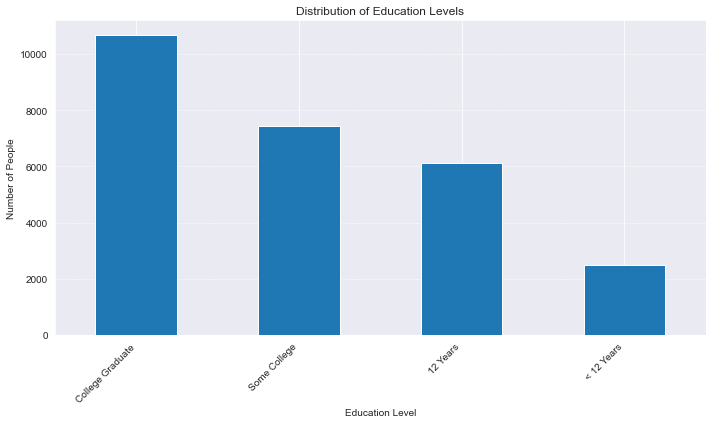

In [17]:
#creating a barplot
sns.set_style(style="darkgrid")

plt.figure(figsize=(10, 6)) 

df['education'].value_counts().plot(kind='bar', title='Education Distribution')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.title("Distribution of Education Levels")
plt.xlabel("Education Level")
plt.ylabel("Number of People")

plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()

The highest bar corresponds to "College Graduate," indicating that this is the most common education level among the individuals in the dataset.
Decreasing Frequency: As we move from "Some College" to "12 Years" and then to "<< 12 Years," the height of the bars decreases. This suggests that fewer individuals have these lower levels of education.

#### HISTOGRAM 


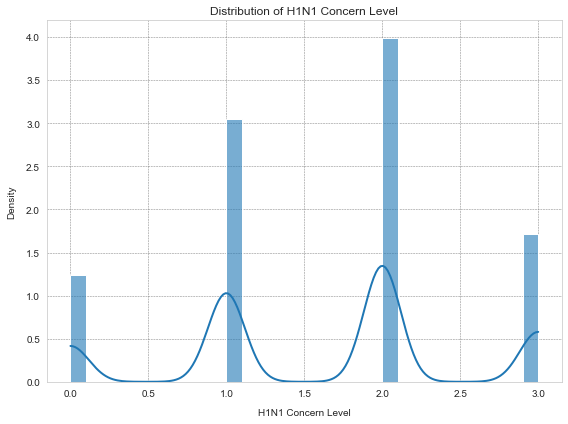

In [18]:
#plotting a histogram with a kde plot
sns.set_style("whitegrid")  
plt.figure(figsize=(8, 6)) 
sns.histplot(
    data=df,
    x="h1n1_concern",
    bins=30, 
    kde=True,
    stat="density",  
    line_kws={"color": "red", "lw": 2},  
    fill=True,  
    alpha=0.6,  
)

plt.xlabel("H1N1 Concern Level", labelpad=10) 
plt.ylabel("Density", labelpad=10)  

plt.title("Distribution of H1N1 Concern Level")
plt.grid(True, linestyle="--", linewidth=0.5, color="gray", which="both", axis="both")
plt.tight_layout()

plt.show()

From the plot above, it shows that people have different levels of concern about H1N1. Most people have low concern, but some people have high concern. This means that the distribution of concern is not evenly spread out. Instead, it has two peaks.

#### COUNTPLOTS
The count plots are used to show the distribution of h1n1_vaccine and seasonal_vaccine.

In [19]:
#defining a function to create a countplot
def countplot(df, x_var, title):
    sns.set_style("whitegrid")  
    plt.figure(figsize=(8, 6)) 

    sns.countplot(x=x_var, data=df, palette="Set2") 

    plt.xlabel(x_var, labelpad=10)  
    plt.ylabel("Count", labelpad=10)

    plt.title(title)
    plt.xticks(rotation=45, ha="right") 

    plt.grid(True, linestyle="--", linewidth=0.5, color="gray", which="both", axis="both")
    plt.tight_layout()  

    plt.show()

Creating a countplot for h1n1_vaccine:

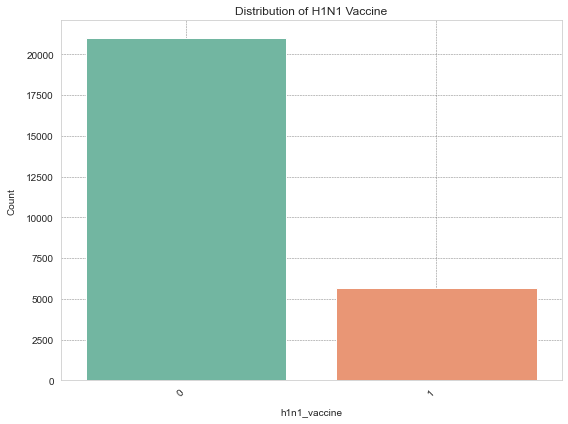

In [20]:
#creating a countplot for h1n1 vaccine
countplot(df, 'h1n1_vaccine', "Distribution of H1N1 Vaccine")

From the above countplot, majority of the people did not receive the H1N1 vaccine. The bar corresponding to '0'(no vaccine) is significantly taller the the bar '1'(received vaccine). This indicates that majority of the individual in this dataset did not receive the H1N1 vaccine.

##### BARPLOT TO INVESTIGATE THE RELATIONSHIP BETWEEN EDUCATION LEVEL AND H1N1 VACCINE UPTAKE

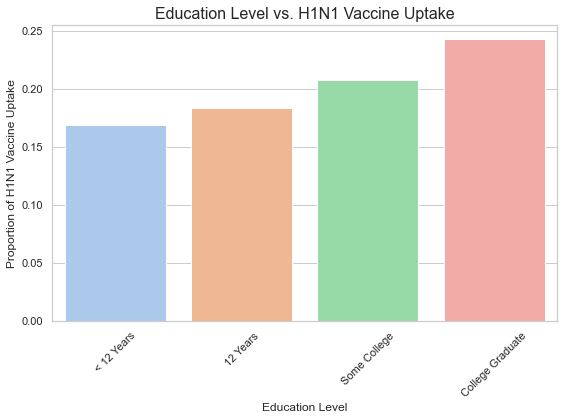

In [21]:
#plotting the bar plot
sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(8, 6))
education_order = ['< 12 Years', '12 Years', 'Some College', 'College Graduate']
sns.barplot(x='education', y='h1n1_vaccine', data=df, order=education_order, ci=None)
plt.title('Education Level vs. H1N1 Vaccine Uptake', fontsize=16)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Proportion of H1N1 Vaccine Uptake', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The bar plot illustrates the relationship between education level and the proportion of individuals who received the H1N1 vaccine.
Individuals with a college graduate degree have the highest proportion of H1N1 vaccine uptake. As education level decreases, the proportion of individuals receiving the vaccine also tends to decrease. There appears to be a noticeable difference in vaccination rates between those with some college education and those with less than 12 years of education.

##### SCATTERPLOT TO INVESTIGATE THE RELATIONSHIP BETWEEN AGE GROUP AND SEX VS H1N1 VACCINE UPTAKE

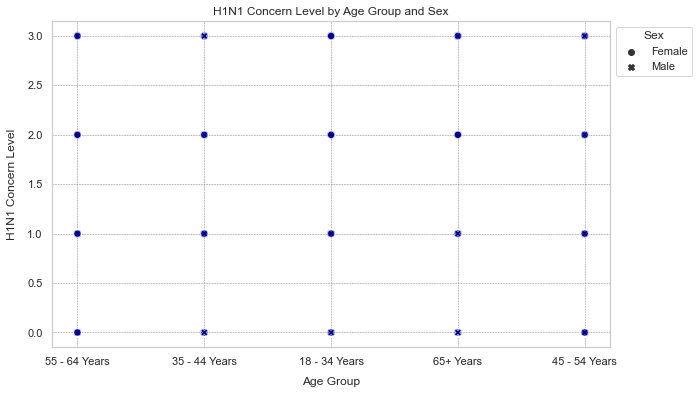

In [22]:
#plotting a scatterplot
sns.set_style("whitegrid")  
plt.figure(figsize=(10, 6))  
ax = sns.scatterplot(
    x="age_group",
    y="h1n1_concern",
    color="darkblue",
    data=df,
    style="sex",  
    s=50,  
    alpha=0.7, 
)
plt.xlabel("Age Group", labelpad=10)  
plt.ylabel("H1N1 Concern Level", labelpad=10)
plt.title("H1N1 Concern Level by Age Group and Sex")
plt.grid(True, linestyle="--", linewidth=0.5, color="gray", which="both", axis="both")
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, title="Sex", loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

The scatter plot suggests that age group is a stronger predictor of H1N1 concern than sex, with younger individuals expressing higher levels of concern. There appears to be a general trend where younger age groups (18-34 years) express higher levels of H1N1 concern compared to older age groups (55-64 years and 65+ years).

### DATA PREPROCESSING
The raw data is prepared for analysis and modeling to ensures data quality, transforming data into a suitable format, reducing dimensionality, handling outliers, and ensuring consistency. By effectively preprocessing data, we can improve the accuracy and reliability of our analysis and models.

In [23]:
#making a copy of the original training and testing dataset
df_copy = df.copy()

#### ENCODING CATEGORICAL COLUMNS
In this section, OneHotEncoder from sklearn is used to convert categorical data into numerical values that can be used by machine learning algorithms. It creates a binary vector where only one element is 1, representing the present category. This prevents the algorithm from assuming an ordinal relationship and can improve model performance.

In [24]:
from sklearn.preprocessing import OneHotEncoder
# Instantiate the encoder
onehot_encoder = OneHotEncoder(sparse=False, drop='first') 

# Apply the encoder to categorical columns
encoded_data = onehot_encoder.fit_transform(df_copy[categorical_cols])

# Convert to DataFrame and concatenate with the original DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=onehot_encoder.get_feature_names_out(categorical_cols))
df_copy = pd.concat([df_copy, encoded_df], axis=1).drop(columns=categorical_cols)


### STANDARDIZING NUMERICAL COLUMNS

Standardizing the numerical columns to normalize numerical data. It transforms the data so that it has a mean of 0 and a standard deviation of 1.

In [25]:
#importing the necessary libraries
from sklearn.preprocessing import StandardScaler

#instantiating the standard scaler
scaler = StandardScaler()

#scaling the data
df_copy[numeric_cols] = scaler.fit_transform(df_copy[numeric_cols])

In [26]:
#investigating the mean and standard deviation
df_copy.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
count,2.670700e+04,2.670700e+04,2.670700e+04,2.670700e+04,2.670700e+04,2.670700e+04,2.670700e+04,2.670700e+04,2.670700e+04,2.670700e+04,...,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000
mean,3.405454e-17,2.979773e-17,1.572362e-16,-1.862358e-18,-1.117415e-16,-1.596307e-18,1.457960e-16,-1.556399e-17,8.859502e-17,8.753082e-17,...,0.040551,0.019770,0.028944,0.028906,0.034560,0.026323,0.080653,0.037593,0.137604,0.017973
std,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,...,0.197252,0.139212,0.167652,0.167546,0.182667,0.160096,0.272307,0.190214,0.344491,0.132855
min,-1.731986e+00,-1.781960e+00,-2.044279e+00,-2.262927e-01,-1.634957e+00,-2.720971e-01,-2.177944e+00,-7.458901e-01,-7.117983e-01,-1.453764e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.659930e-01,-6.818488e-01,-4.236260e-01,-2.262927e-01,-1.634957e+00,-2.720971e-01,4.591486e-01,-7.458901e-01,-7.117983e-01,-1.453764e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000e+00,4.182621e-01,-4.236260e-01,-2.262927e-01,6.116368e-01,-2.720971e-01,4.591486e-01,-7.458901e-01,-7.117983e-01,6.878696e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.659930e-01,4.182621e-01,1.197027e+00,-2.262927e-01,6.116368e-01,-2.720971e-01,4.591486e-01,1.340680e+00,1.404892e+00,6.878696e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.731986e+00,1.518373e+00,1.197027e+00,4.419056e+00,6.116368e-01,3.675158e+00,4.591486e-01,1.340680e+00,1.404892e+00,6.878696e-01,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### MODELLING

##### LOGISTIC REGRESSION

In [27]:
#importing the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [28]:
#defining the features and target
X = df_copy.drop(columns=['h1n1_vaccine'])
y = df_copy['h1n1_vaccine'].astype('int')

#splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#instatiating the Logistic Regression model
logreg = LogisticRegression(random_state=42)

#fitting the model
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

In [29]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.85

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4212
           1       0.70      0.51      0.59      1130

    accuracy                           0.85      5342
   macro avg       0.79      0.72      0.75      5342
weighted avg       0.84      0.85      0.84      5342


Confusion Matrix:
[[3962  250]
 [ 557  573]]


#### MODEL EVALUATION

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#calculating Metrics for h1n1 model
accuracy_h1n1 = accuracy_score(y_test, y_pred)
precision_h1n1 = precision_score(y_test, y_pred)
recall_h1n1 = recall_score(y_test, y_pred)
f1_h1n1 = f1_score(y_test, y_pred)


print("Logistic Regressiom Model - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1 Score: {:.4f}".format(accuracy_h1n1, precision_h1n1, recall_h1n1, f1_h1n1))


Logistic Regressiom Model - Accuracy: 0.8489, Precision: 0.6962, Recall: 0.5071, F1 Score: 0.5868


#### ROC-AUC CURVE FOR H1N1 VACCINE

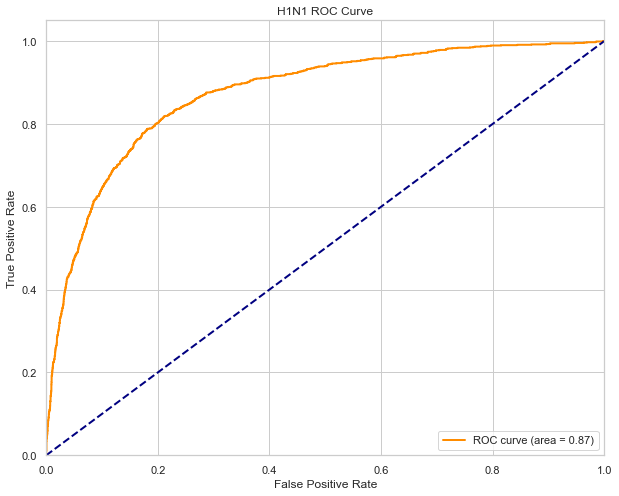

In [31]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('H1N1 ROC Curve')
plt.legend(loc="lower right")
plt.show()


#### CONFUSION MATRIX

In [32]:
cm = confusion_matrix(y_test, y_pred)

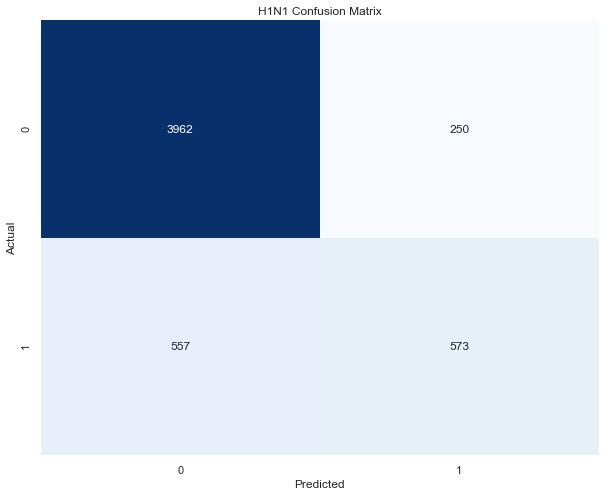

In [33]:
#confusion Matrix Heatmap for h1n1
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("H1N1 Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Accuracy: 85% of the samples were correctly classified.
Precision: 69% of the samples predicted as positive were actually positive.
Recall: 51% of the actual positive samples were correctly predicted.
F1-score: The model's overall performance is considered moderate, balancing precision and recall.

#### CROSS VALIDATION

In [45]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(logreg, X_train, y_train, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", cv_scores.mean())


Cross-Validation Scores: [0.84413761 0.85654107 0.85092441 0.84741399 0.85326469]
Average Cross-Validation Score: 0.8504563538497543


#### LOGISTIC REGRESSION USING POLYNOMIAL FEATURES

In [41]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features (e.g., degree 2)
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Train a model using the polynomial features
logreg_poly = LogisticRegression()
logreg_poly.fit(X_train_poly, y_train)
y_pred_poly = logreg_poly.predict(X_test_poly)

#calculating Metrics for h1n1 model
accuracy_h1n1 = accuracy_score(y_test, y_pred_poly)
precision_h1n1 = precision_score(y_test, y_pred_poly)
recall_h1n1 = recall_score(y_test, y_pred_poly)
f1_h1n1 = f1_score(y_test, y_pred_poly)

print("Logistic Regressiom Model (polynomial) - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1 Score: {:.4f}".format(accuracy_h1n1, precision_h1n1, recall_h1n1, f1_h1n1))


Logistic Regressiom Model (polynomial) - Accuracy: 0.8291, Precision: 0.6090, Recall: 0.5363, F1 Score: 0.5704


#### DECISION TREES

In [34]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt.predict(X_test)

# Evaluate the model on the test set
print("Test Accuracy for Decision Tree:", accuracy_score(y_test, y_pred_dt))
print("Classification Report for Decision Tree (Test):\n", classification_report(y_test, y_pred_dt))

Test Accuracy for Decision Tree: 0.7834144515162861
Classification Report for Decision Tree (Test):
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      4212
           1       0.49      0.50      0.49      1130

    accuracy                           0.78      5342
   macro avg       0.68      0.68      0.68      5342
weighted avg       0.79      0.78      0.78      5342



#### CONFUSION MATRIX

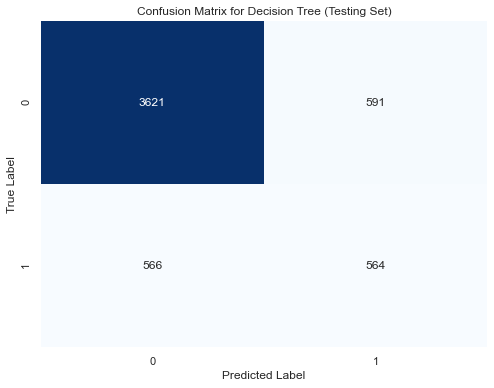

In [35]:
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Confusion matrix 

plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Decision Tree (Testing Set)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### ROC AUC CURVE

In [36]:
from sklearn.metrics import roc_curve, roc_auc_score

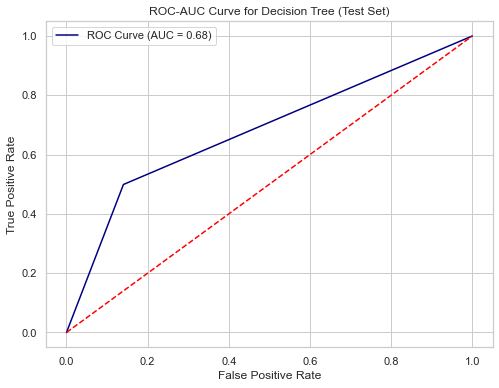

In [37]:
y_pred_proba_dt = dt.predict_proba(X_test)[:, 1]
#ROC-AUC Curve for the Train Set
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_dt)
roc_auc = roc_auc_score(y_test, y_pred_proba_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='navy', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve for Decision Tree (Test Set)")
plt.legend()
plt.show()

From the confusion matrix: Accuracy: 81% of the samples were correctly classified.
Precision: 49% of the samples predicted as positive were actually positive.
Recall: 50% of the actual positive samples were correctly predicted.
F1-score: The model's overall performance is considered moderate, balancing precision and recall.

AUC = 0.68: This indicates that the model's performance is moderately good. While it's not perfect, it's better than random guessing.
Curve Shape: The curve shows a general upward trend, indicating that as the TPR increases, the FPR also increases. This is expected, as increasing the sensitivity to positive cases often leads to an increase in false positives.
Comparison to the Random Guess Line: The dashed line represents the ROC curve of a random classifier. Since the model's curve lies above the random guess line, it confirms that the model is performing better than random chance.

In [44]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(dt, X_train, y_train, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", cv_scores.mean())


Cross-Validation Scores: [0.7830564  0.78446057 0.79171542 0.79031126 0.78680084]
Average Cross-Validation Score: 0.7872688977299321


### EVALUATION

The prediction of the likelihood of an individual to get h1n1 vaccine was carried out through various machine learning models that include: Logistic Regression and decision trees.The evalution metrics used were the accuracy, precision, f1score and Recall.

The results of the prediction of the likelihood of an individual to get h1n1 vaccine using logistic regression model are as follows: The model had a high accuracy of Accuracy: 0.83 while logistic regression model using polynomial feature had an accuracy of 0.83.
Logistic regression using polynomial features performed fairly well although it had an accuracy og 0.83, compared to the first model performs the same
The results of the prediction of the likelihood of an individual to get h1n1 vaccine using decision
trees model are as follows: The model had a high accuracy of Accuracy: 0.78.
However, the logistic regression model outways both models with an accuracy of 0.83.





#### CONCLUSION

Overall the first model (logistic regression model) performed better in predictin the likelihood of an individual to get h1n1 vaccine than the other models.
The potential impacts of the model include:
Improved Public Health Decision-Making: Public health officials can use the model to identify individuals at high risk of non-vaccination and tailor targeted interventions to increase vaccination rates.This can help to mitigate the spread of the virus and reduce the overall burden of disease on the healthcare system.
Enhanced Resource Allocation: By identifying individuals most likely to benefit from vaccination, healthcare providers can allocate resources more efficiently, ensuring that vaccines are distributed to those who need them most. This can help to optimize the use of limited resources and improve the overall effectiveness of vaccination campaigns.
Increased Confidence in Public Health Measures: A well-performing model can strengthen public confidence in the effectiveness of vaccination programs and other public health measures.
This can encourage greater public participation in disease prevention efforts.
Informed Policy Development:Government agencies can use the model to inform the development of public health policies, such as vaccine allocation strategies and resource allocation plans. This can help to ensure that policies are evidence-based and effective in addressing the needs of the population.

#### RECOMMENDATIONS

1. Hyperparameter Tuning: Conduct a more thorough hyperparameter optimization process to identify the optimal values for parameters such as regularization strength, learning rate, and number of iterations.
2. Feature Engineering: Explore creating new features or transforming existing ones to better capture relevant patterns and improve predictive power.
3. Collecting more upto date data.
4. Model Selection: Consider alternative models, such as Random Forest.


#### NEXT STEPS

1. Continuous Monitoring: Implement a system to monitor the model's performance in a production environment and identify any degradation over time.
2. Retraining: Regularly retrain the model on new data to ensure it remains accurate and up-to-date.
3. urther analysis to determine the specific features that affect the vaccination of individuals
4. Deployment of the best performing model